In [3]:
from numpy import sin, cos, pi, exp
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from IPython.display import Audio

# Configure default pyplot settings
plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

# Enable importing from modules in top-level directory
from sys import path
if path[0] != '..': path.insert(0, '..')

<img src="figures/NTNU_logo_vertical.svg" align="left" style="width: 30%">
<br clear="all" />
<br></br>

# Sinusoids

* **AIS2201 - Signal Processing**
* **Week 34**
* **Lecturer: Kai Erik Hoff**

# Topics
* Intro to signal analysis
    - Time domain
    - Frequency domain
* Sinusoid properties
    - Frequency (angular/Hz)
    - Amplitude / Magnitude
    - Vector addition principle
    - Frequency mixing
* Sinusoids as basis for frequency analysis

## About Signals

<div width="100%">
    <img src="figures/Fig1_signaleksempel.png" align="right" width="35%"/>
    <div style="width: 55%">
    <br>
    <ul>
      <li>A <i>signal</i> can be described as some measurable quantity carrying information. </li>
      <ul><li>DSP systems typically use electrical signals.</li>
          <li>Can be voltage output from sensors, antennas etc.</li></ul>
      <li>1-Dimensional signals of primary concern for this course</li>
      <ul><li>Eg. time-varying voltage signal.</li>
      <li>Sound, IMU measurements, EMG etc.</li></ul>
      <li>Multidimensional signals can also occur.</li>
      <ul><li>Images are considered to be 2-dimensional. Signal value (color) varies with both $x$- and $y$ coordinates.</li>
      <li>Video counts as a 3-dimensional signal, where time is an additional variable compared to images.</li></ul>
    </ul>  
    </div>
</div> 

<br>
<br>


# Signal analysis

* Signal Processing Theory provides a number of tools for analyzing signals.
* Based on inspecting signal properties in the *time domain* or the *frequency domain*.

### Time domain
* 1 second window of an EKG-signal.

<img src="figures/Fig5_EKG.png" align="center" width= "40%" />

### Frequency domain
* EKG signal frequency spectrum.

<img src="figures/EKG_Spectrum.png" align="center" width= "60%" />

## What is the frequency spectrum?


* A function $X(f)$ which represents the decomposition of a time-domain signal $x(t)$ into constituent sine waves / sinusoids.
* Graphical representation:

<img src="figures/Fig6_EKG_decomp.png" width="100%" />


# Displaying the frequency spectrum using Python

-0.017109642338161535 0.0


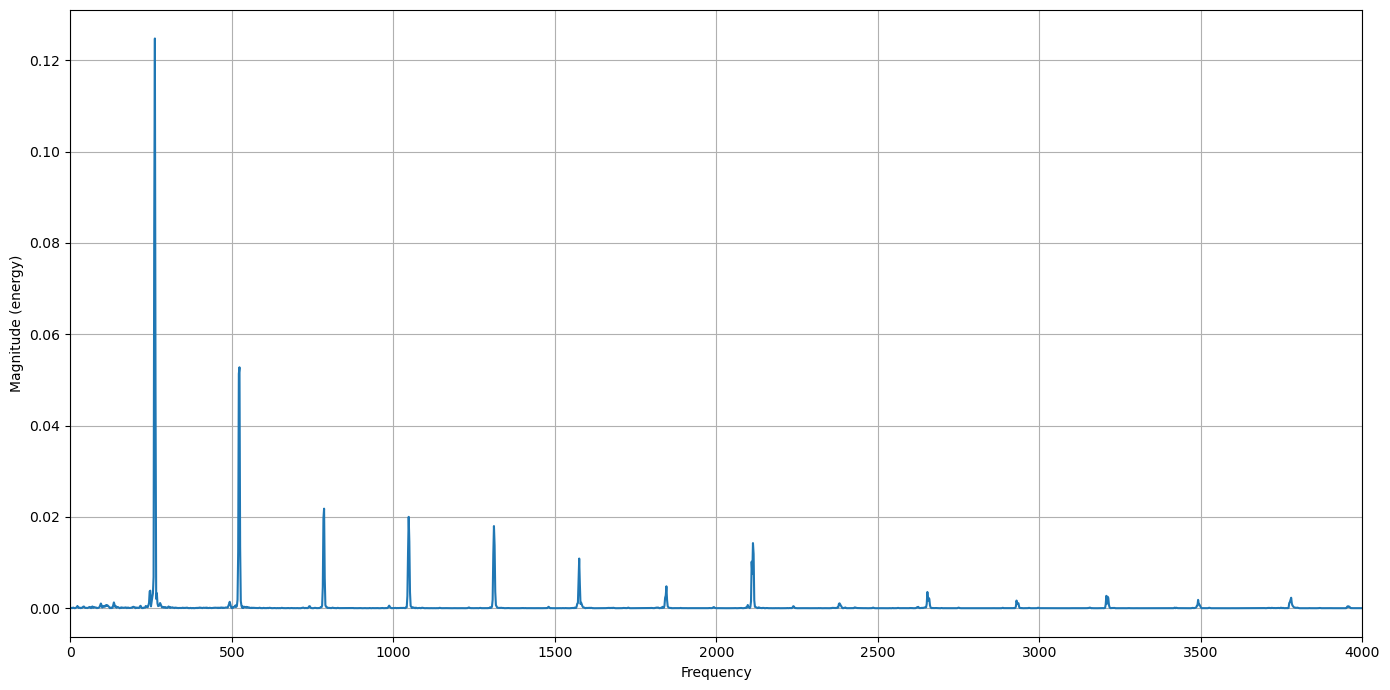

In [2]:
from scipy.io import wavfile
from IPython.display import Audio
fs, sampleData = wavfile.read("Datafiler/03_Sinussignal/piano.wav") # Load audio file
x = sampleData/max(abs(sampleData)) # Normaliser til -1 < x[n] < 1 og konverter til flyttall 

y = x.copy()
y[0] = 0
print(x[0], y[0])

%matplotlib inline
plt.figure(figsize=(14,7))
plt.magnitude_spectrum(x, fs)
plt.xlim([0, 4000])
Audio(sampleData, rate = fs)

## Sinusuoids - *the basis for all freqency analysis*
* Pure waves - frequency spectrum is a single spike.
* Mathematical expresssion
$$x(t) = A\cdot \cos\left(\omega\cdot t + \phi \right)$$
    - $A$ is the sinusoid's *Amplitude*
    - $\omega$ is the sinusoid's *angular frequency* (rad/s:)
    - Frequency $f$ can also be a measurement of cycles per second ($Hz$)
        - $\omega = 2\pi \cdot f \leftrightarrow f = \frac{\omega}{2\pi}$
    - $\phi$ is the sinusoid's *phase* *fase*
      - Unit: radians ($\text{rad}$) or degrees ($^{\circ}$)

<img src="figures/Fig2_sinusbølge.png" width="80%" />


## Important distinctions in terminology

### Amplitude vs. Magnitude

* **Magnitude** is a measure of the strength of a sinusiod's oscillations and is always positive.
* **Amplitude** is a mathematical variable in a function expression and can be positive, negative or even complex valued.

$$ \text{Magnitude} =\boldsymbol{\big|} \text{Amplitude} \boldsymbol{\big|}$$

## Sinusoids vs. trigonometric functions

* A **Sinusoid**  is *any* signal $x(t)$ which can be expressed as using a sine/cosine function: $x(t) = A\cdot \cos(\omega \cdot t + \phi)$.
* If we are specifically referencing strictly cosine ($A \cdot \cos(\omega \cdot t)$) or sine ($A \cdot \sin(\omega \cdot t)$) terms, we will use the term *cosine function* or *sine function*


* Important note: The only difference between a sine function and a cosine function is a $\frac{\pi}{2} \text{ rad}$ or $90^{\circ}$ phase shift:
$$\sin(\omega \cdot t) = \cos \left( \omega \cdot t - \frac{\pi}{2} \right) $$

## Python-demo: *sinusoid* 
$$x(t) = A\cdot \cos(2\pi \cdot f \cdot t + \phi )$$

Output()

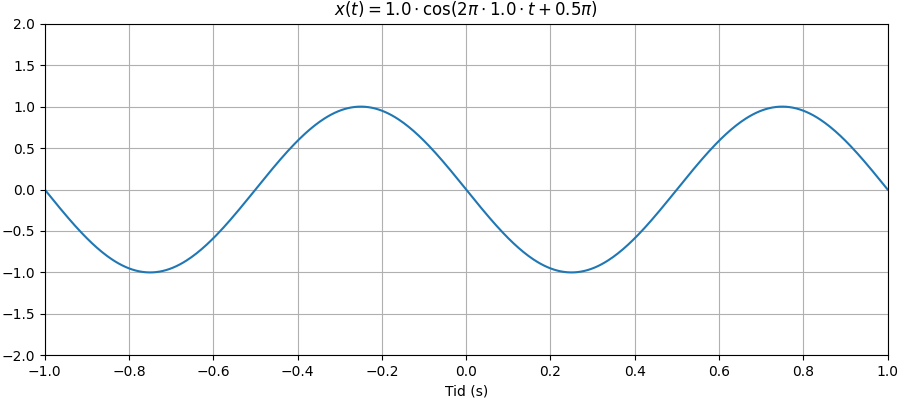

In [34]:
%matplotlib ipympl
from demos import SineWaveDemo
SineWaveDemo(2, fig_size=(9,4));

## Why sinusoids?

* Sinusoids not the only function which can be used to decompose signals.
* Wouldn't a square wave be simpler?

* Sinusoids have some special properties which make them uniquely useful when analyzing linear systems

## Differentiation of sinusoids

* The derivative of a sinusoid is another sinusoid

$$\begin{align}
\frac{d}{dt} \left(A\cdot \cos (\omega \cdot t) \right) &= A \cdot -\sin( \omega \cdot t) \cdot \omega & \text{(kernel rule)} \\
&= A \cdot \omega \cdot \cos \left(\omega \cdot t + \frac{\pi}{2} \right) & 
\end{align}$$



Text(0.5, 1.0, "A sinusoid and it's derivative")

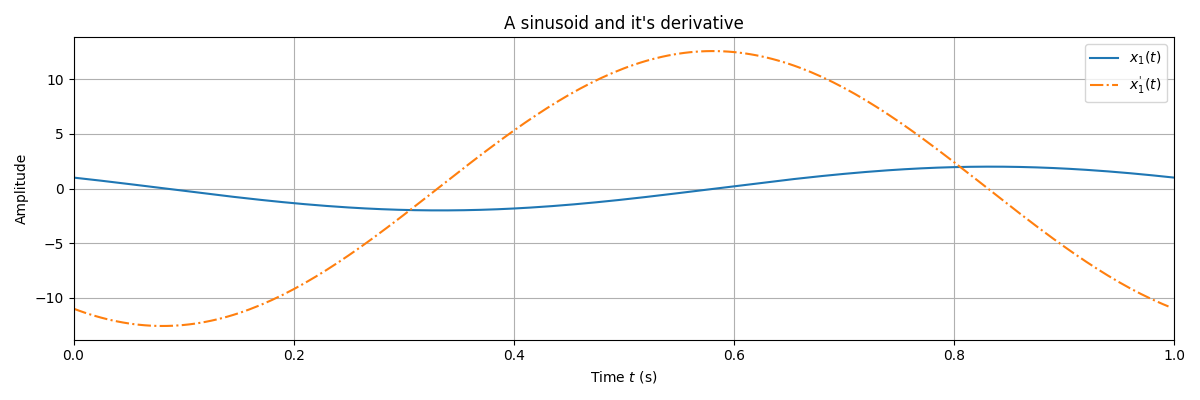

In [8]:
import numpy as np
from numpy import cos, sin, pi
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 201)
x1 = 2*cos(2*pi*t + pi/3)

x2 = np.diff(x1)/np.diff(t) # Numerical differentiation

plt.close(3), plt.figure(3, figsize=(12,4))
plt.plot(t, x1, label = "$x_1(t)$")
plt.plot(t[:-1], x2, "-.", label = "$x_1^'(t)$")
plt.legend()
plt.xlabel("Time $t$ (s)")
plt.ylabel("Amplitude")
plt.title("A sinusoid and it's derivative")

* Differentiation causes a change in magnitude and phase, but retains the same shape.

## Adding sinusoids

* When two sinusoids of equal frequency are added together, the result is another sinusoid.


Text(0.5, 1.0, 'Two sinusoids and their sum')

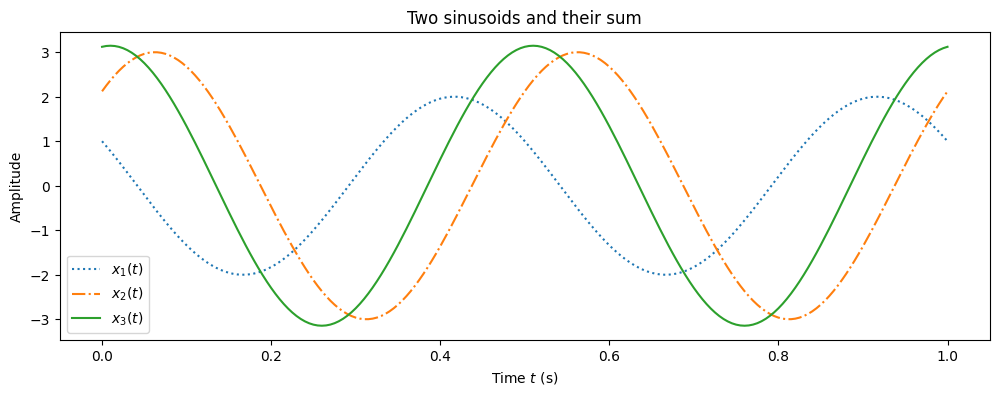

In [1]:
import numpy as np
from numpy import cos, sin, pi
import matplotlib.pyplot as plt
%matplotlib inline

t = np.linspace(0, 1, 201)
x1 = 2*cos(4*pi*t + pi/3)
x2 = 3*cos(4*pi*t - pi/4)
x3 = x1 + x2

plt.close(4), plt.figure(4, figsize=(12,4))
plt.plot(t, x1, ":", label = "$x_1(t)$")
plt.plot(t, x2, "-.", label = "$x_2(t)$")
plt.plot(t, x3, label = "$x_3(t)$")
plt.legend()
plt.xlabel("Time $t$ (s)")
plt.ylabel("Amplitude")
plt.title("Two sinusoids and their sum")

## Phasors
* For a given frequency $\omega$, the properties of a sinusoid $A \cdot \cos(\omega \cdot t + \phi)$  can be fully determined by it's amplitude $A$ and it's phase $\phi$.
* The phasor $\boldsymbol{A} = A\cdot e^{j\phi}$ combines amplitude $A$ and phase $\phi$ to one single vector in the complex plane.

Output()

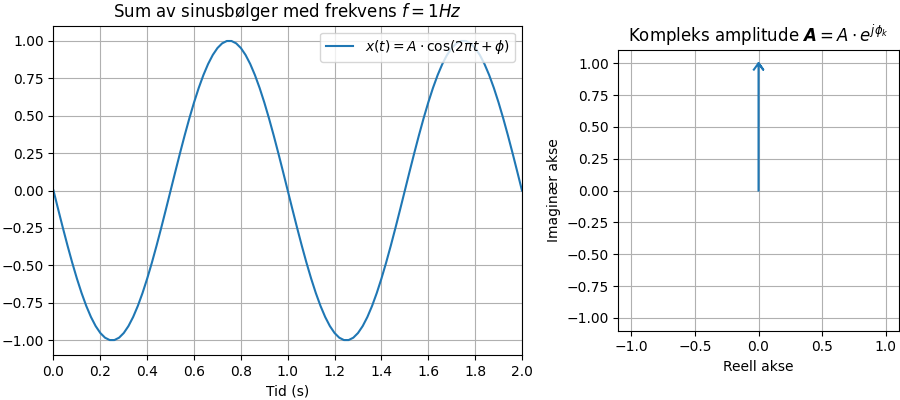

In [35]:
from demos import PhasorDemo
%matplotlib ipympl
PhasorDemo(fig_num=2);

## Vector addition principle

* Given a sum of sinusoids:
#### $$\sum_{k=1}^{N}A_k \cdot \cos\left(\omega_0 \cdot t + \phi_k \right) = A\cdot \cos \left(\omega_0 \cdot t + \phi \right)$$

* The amplitude $A$ and phase $\phi$ for the resulting sinusoid can be found through vector addition.
    * Represent each component sinusoid as a complex vector (or phasor) $\boldsymbol{A_i} = A_i \cdot e^{j\phi_i}$
    * The sum of all component phasors $\boldsymbol{A}_i$ is the phasor for the sum of all sinusoids.
    
$$A = \left|A_1e^{j\phi_1} + A_2e^{j\phi_2}+\cdots\right|$$
$$\phi = \angle \left( A_1e^{j\phi_1} + A_2e^{j\phi_2}+\cdots\right) $$

## Demo: *vector addition principle*

Output()

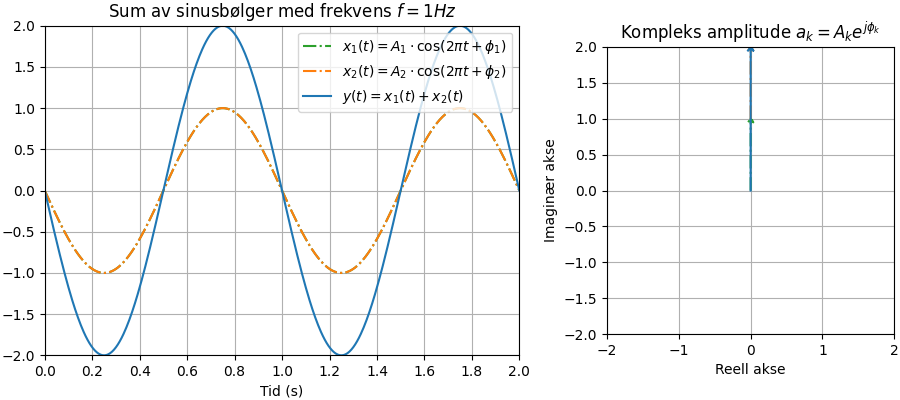

In [36]:
%matplotlib ipympl
from demos import VectorSumDemo
VectorSumDemo(5);

## Example: vector addition principle applied to circuit analysis

* Given a series RL circuit as shown with current $i(t) = \cos(100 \cdot t)$, what is the voltage $v_1(t)$?

<img src="figures/RLC.png" width="80%" />

$$\begin{align}
v_C(t) &= \frac{1}{C}\int_0^t i(\tau) d\tau\\
 &= \frac{1}{C}\int_0^t \cos(2\pi \cdot 50 \cdot \tau)d\tau\\
 &= \frac{1}{C}\cdot \sin(2\pi \cdot 50 \cdot t)\cdot \frac{1}{100\pi}\\
 &= \frac{1}{C}\cdot \cos\left(2\pi \cdot 50 \cdot t - \frac{\pi}{2}\right)\cdot \frac{1}{100\pi}\\ \\ 
v_R(t) &= R \cdot i(t)\\
&= R \cdot \cos(2\pi \cdot 50 \cdot t) \\ \\
v_1(t) &= v_R(t) + v_C(t) \\
&= R \cdot \cos(2\pi \cdot 50 \cdot t) + \frac{1}{C\cdot 100\pi}\cdot \cos\left(2\pi \cdot 50 \cdot t - \frac{\pi}{2}\right)
\end{align}$$

# Calculating the frequency spectrum of a signal



* Accomplished by using the Fourier Transform:
$$\begin{align}
X(\omega) &= \int_{-\infty}^{\infty} x(t) \cdot e^{-j\cdot \omega \cdot t} dt\\
&= \int_{-\infty}^{\infty}x(t) \cdot \cos( \omega \cdot t) dt - j \cdot \int_{-\infty}^{\infty}x(t) \cdot \sin( \omega \cdot t) dt
\end{align}$$

* Fair enough, but what's actually going on here?

* First off, let's start by studying the more approachable *fourier series decomposition* formula:

$$ \boldsymbol{a}_k = \frac{1}{T}\int_0^T x(t)\cdot \left( \cos\left(2\pi \cdot \frac{k}{T} \cdot t \right) - j \sin\left(2\pi \cdot \frac{k}{T}  \cdot t\right) \right) dt$$

* Let's focus on what happens when we multiply a signal $x(t)$ with a sinusoid.

<img src="figures/waveform.png" width="70%" />

#  Frequency mixing



* Term for multiplying a signal with a sinusoid

* Multiplying two sinusoids will create a new signal with different frequency composition
    * This composition can be found using a well known trigonometric idenity:
    
    $$ \cos(a)\cdot \cos(b) = \frac{1}{2} \cdot \cos(a-b) + \frac{1}{2} \cdot \cos(a+b)$$<br>
    
    * Substing $a$ with $2\pi \cdot f_1 \cdot t$ and $b$ with $2\pi \cdot f_2 \cdot t$ gives:

    $$ \cos\left( 2\pi f_1 \cdot t \right) \cdot \cos\left( 2\pi f_2 \cdot t \right) = \frac{1}{2}\cos\left(2\pi (f_1 - f_2) \cdot t \right) + \frac{1}{2}\cos\left(2\pi (f_1 + f_2) \cdot t \right)$$<br>
    



* The product of two sinusoids is the sum of two new sinusoids, with frequencies $f_1-f_2$ og $f_1+f2$

## Demo: *frequency mixing*

Output()

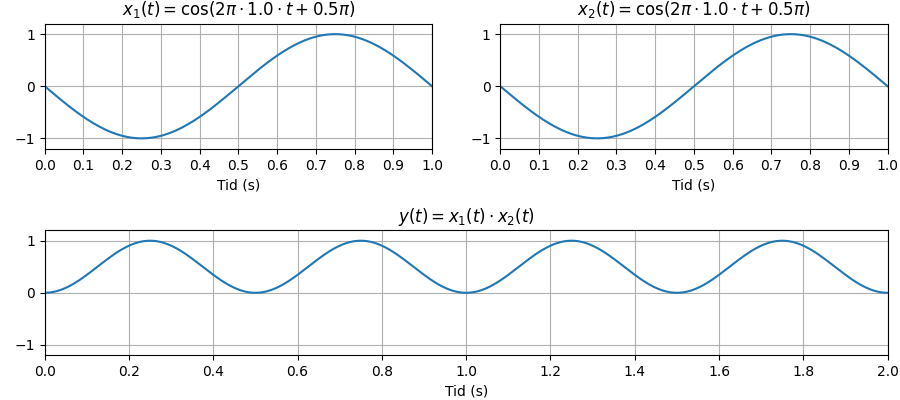

In [5]:
%matplotlib ipympl 
from demos import FrequencyMixingDemo
FrequencyMixingDemo(6, fig_size=(9, 4));

## Interesting fact about radio systems

* Frequency mixing is an essential component of all radio communication.
    * Allows electronic systems to "move" the frequency content of a baseband signal such as audio far into the radio frequency spectrum
 
* The science of shaping a high-frequency carrier wave to contain a signal is referred to as *modulation*

* Simplest form of modulation is [Amplitude Modulation (AM)](https://en.wikipedia.org/wiki/Amplitude_modulation)

## Frequency mixing of "unknown" sinusoid $x(t)$

* Let's look at a case where a sinusoid $x(t)$ has a known frequency $f$, but unknown amplitude $A$ and phase $\phi$.

In [50]:
import numpy as np

random_mag, random_phase = np.random.rand(2)*np.array([10, 2*np.pi]) # Randomly generated amplitude and phase for purposes of example
t = np.linspace(0, 1, 300, endpoint=False)
f = 5
x = random_mag*np.cos(2*np.pi*f*t + random_phase)

* Mixing with a spure sine or pure cosine wave of frequency $f$ produces a constant term:
\begin{align*}
x(t) \cdot \cos(2\pi \cdot f \cdot t) &=  A \cdot \cos(2\pi \cdot f \cdot t + \phi) \cdot \cos(2\pi \cdot f \cdot t) \\
&= \frac{A}{2} \cdot \cos(\phi) + \frac{A}{2} \cdot \cos(2 \pi\cdot f \cdot t + \phi) \\ \\
x(t) \cdot \sin(2\pi \cdot f \cdot t) &=  A \cdot \cos(2\pi \cdot f \cdot t + \phi) \cdot \sin(2\pi \cdot f \cdot t) \\
&= -\frac{A}{2} \cdot \sin(\phi) + \frac{A}{2} \cdot \sin(2 \pi\cdot f \cdot t + \phi) \\ \\
\end{align*}

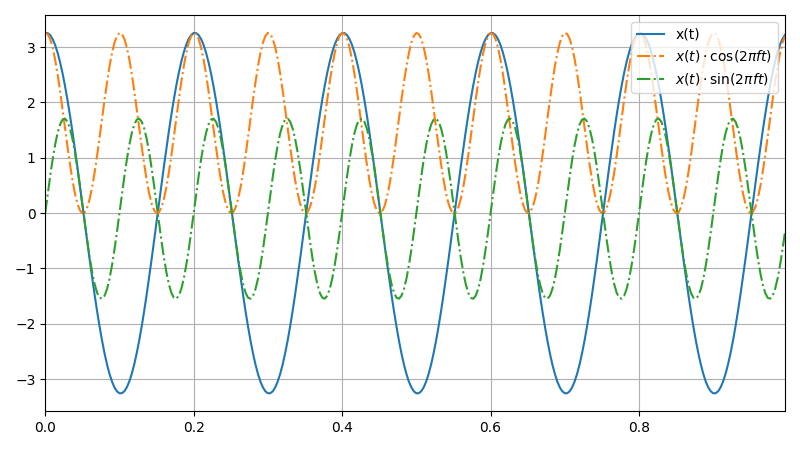

In [53]:
plt.close(7), plt.figure(7)
plt.plot(t, x, label="x(t)")
plt.plot(t, x*np.cos(2*np.pi*f*t), '-.', label="$x(t)\\cdot \\cos(2\\pi f t)$")
plt.plot(t, x*np.sin(2*np.pi*f*t), '-.', label="$x(t)\\cdot \\sin(2\\pi f t)$")
plt.legend(loc="upper right")

# Integration $\rightarrow$ extracting constant term

$$\int_0^T a + b\cdot \cos(2\pi \cdot \frac{k}{T} \cdot t) dt  = a \text{,    for any } a, b \in \mathbb{R}  k \in \mathbb{Z}$$

* The constant term in $x(t)\cdot \cos(\omega\cdot t)$ is proportional to the magnitude of the $\cos(\omega\cdot t)$ term in $x(t)$
    * Constant term = signal mean: $\frac{1}{T}\int_0^{T} x(t) \cdot \cos(2\pi \cdot f \cdot t) dt$
* The constant term in $x(t)\cdot \sin(\omega\cdot t)$ is proportional to the magnitude of the $\sin(\omega\cdot t)$ term in $x(t)$
    * Constant term = signal mean: $\frac{1}{T}\int_0^{T} x(t) \cdot \sin(2\pi \cdot f \cdot t) dt$ 

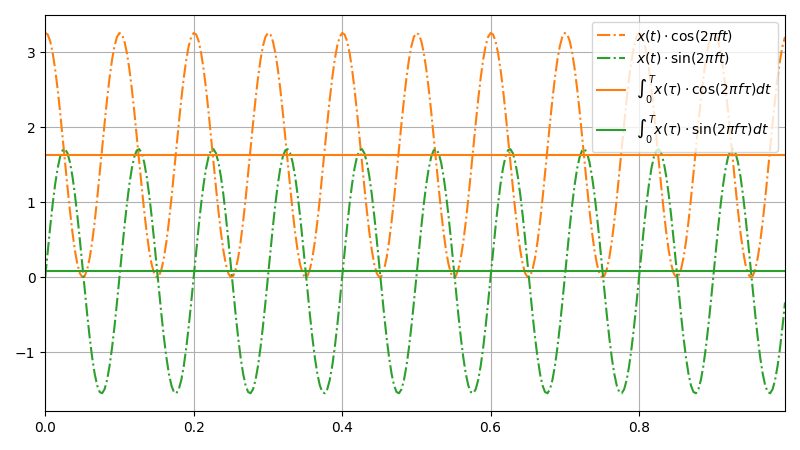

In [55]:
plt.close(8);plt.figure(8)

x_mixed_cos = x*np.cos(2*np.pi*f*t)
x_mixed_sin = x*np.sin(2*np.pi*f*t)
Ax_half = np.mean(x_mixed_cos)
Ay_half = np.mean(x_mixed_sin)

plt.plot(t, x*np.cos(2*np.pi*f*t), 'C1-.',label="$x(t)\\cdot \\cos(2\\pi f t)$")
plt.plot(t, x*np.sin(2*np.pi*f*t), 'C2-.', label="$x(t)\\cdot \\sin(2\\pi f t)$")
plt.plot([t[0], t[-1]], Ax_half*np.ones(2), 'C1', label="$\\int_0^T x(\\tau)\\cdot \\cos(2\\pi f \\tau)dt$")
plt.plot([t[0], t[-1]], Ay_half*np.ones(2), 'C2', label="$\\int_0^T x(\\tau)\\cdot \\sin(2\\pi f \\tau)dt$")
plt.legend(loc="upper right")

* All other wave components with frequencies other than the mixing frequency $f$ are cancelled out by integration

# Comparison

Difference: 0.000


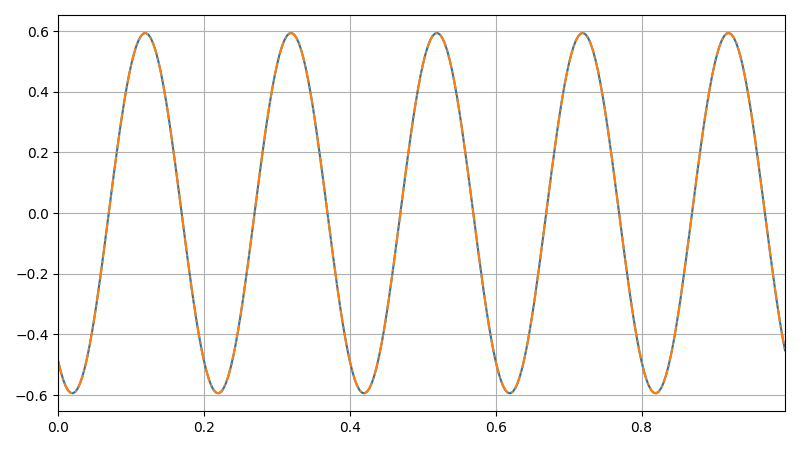

In [49]:
x_reconstructed = 2*Ax_half*cos(2*pi*f*t) + 2*Ay_half*sin(2*pi*f*t)
plt.figure()
plt.plot(t, x_reconstructed)
plt.plot(t, x, '-.')
print(f"Difference: {sum(abs(x-x_reconstructed)):.3f}")

# Calculating the magnitude and phase

* Vector addition principle can be used.